Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()
import plotly.express as px

In [3]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
wine_df = pd.read_csv(r'/Users/saras/Desktop/DSA 2022/datasets/Wine.csv') 

In [5]:
wine_df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [6]:
wine_df.shape

(178, 13)

In [7]:
#Find missing values
wine_df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#Find duplicate values 
print(f'Duplicates in dataset: {wine_df.duplicated().sum()},({np.round(100*wine_df.duplicated().sum()/len(wine_df),1)}%)')


Duplicates in dataset: 0,(0.0%)


In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
wine_df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

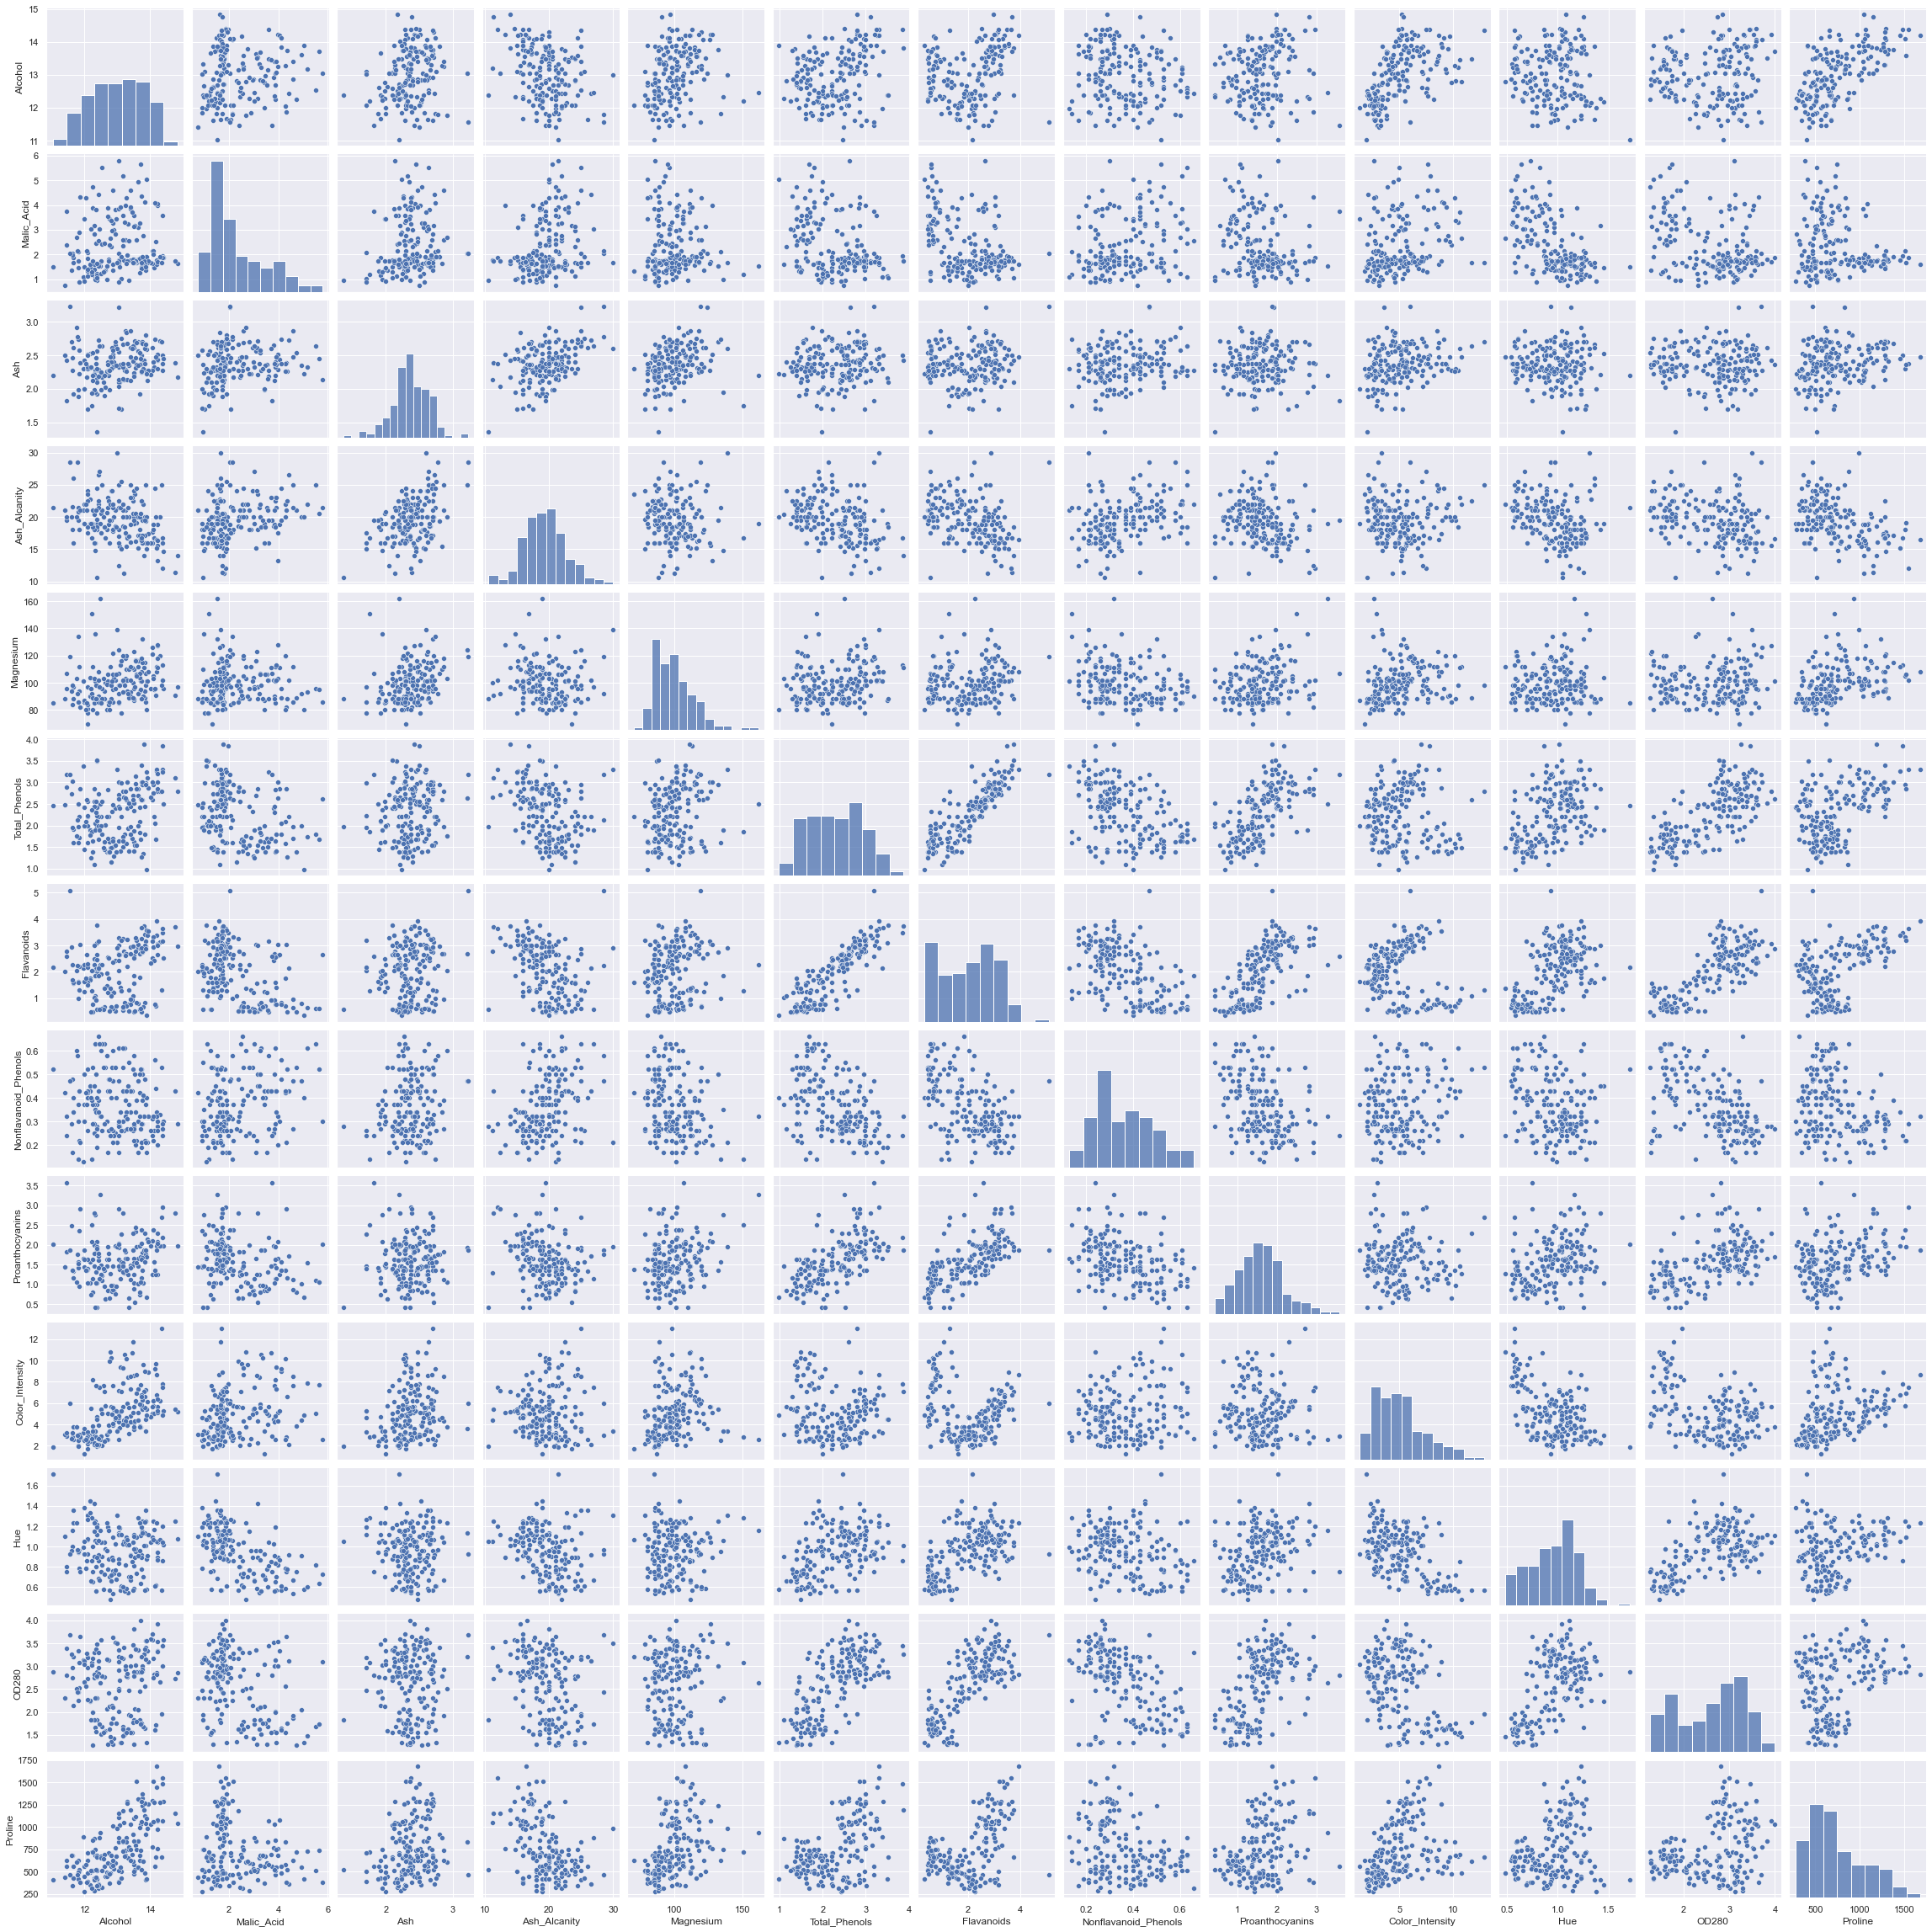

In [11]:
sns.pairplot(wine_df)
plt.show()

In [12]:
#Standardizing the dataset
# This scales each column to have mean=0 and standard deviation=1

# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(wine_df)
scaled_data = pd.DataFrame(scaled_data, columns = wine_df.columns)
scaled_data.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16 -1.160121e-16 -1.995907e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00 -2.671018e+00 -2.088255e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01 -6.891372e-01 -8.244151e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02  1.518295e-03 -1.222817e-01   
75%    8.361286e-01  6.697929e-01  6.981085e-01  6.020883e-01  5.096384e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00  3.154511e+00  4.371372e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.780000e+02  1.780000e+02          1.780000e+02     1.780000e+02   
mean   -2.972030e-16 -4.016762e-16          4.079134e-16    -1.699639e-16   
std     1.002821e+00  1.002821e+00          1.002821e+00     1.002821e+00   
min    -2.107246e+00 -1.695971e+00         -1.868234e+00    -2.069034e+00   
25%    -8.854682e-01 -8.275393e-01         -7.401412e-01    -5.972835e-01   
50%     9.595986e-02  1.061497e-01         -1.760948e-01    -6.289785e-02   
75%     8.089974e-01  8.490851e-01          6.095413e-01     6.291754e-01   
max     2.539515e+00  3.062832e+00          2.402403e+00     3.485073e+00   

       Color_Intensity           Hue         OD280       Proline  
count     1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  
mean     -1.122697e-17  3.717376e-16  2.919013e-16 -7.484650e-18  
std       1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  
min      -1.634288e+00 -2.094732e+00 -1.895054e+00 -1.493188e+00  
25%      -7.951025e-01 -7.675624e-01 -9.522483e-01 -7.846378e-01  
50%      -1.592246e-01  3.312687e-02  2.377348e-01 -2.337204e-01  
75%       4.939560e-01  7.131644e-01  7.885875e-01  7.582494e-01  
max       3.435432e+00  3.301694e+00  1.960915e+00  2.971473e+00

In [13]:
#Dimensionality reduction. 
#This is a powerful technique used to explore the structure of high-dimensional data
#(i.e. lots of features) in a lower dimensional subspace.

#PCA works by finding a low dimensional subspace that maximises the variance of the data in that
#subspace and performing a linear projection. This basically means the data will be as spread out as possible,
#without changing the relationship between the data points. This allows us to find patterns or indentify
#clusters if any exist.

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape


(178, 2)

From 13 features we are now down to 2 features. 

Text(0, 0.5, 'Second Principal Component')

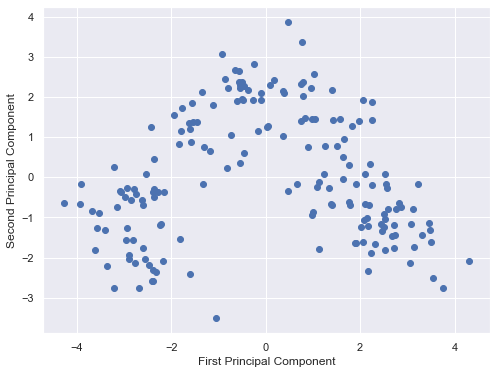

In [14]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [15]:
# displaying the PCA components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

We have to now use a clustering method to understand which classes each of these datapoints fall under. This could be done using K-means clustering or hierachial clustering. 

<h3>K-Means clustering

In [16]:
from sklearn.cluster import KMeans
ks=range(1,6)
inertia = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

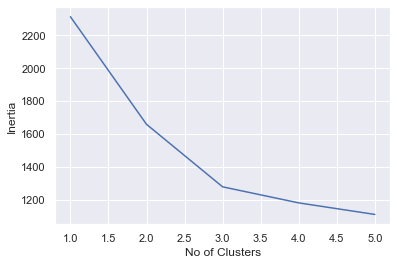

In [17]:
plt.plot(ks,inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

So optimal no. of clusters is 3

In [18]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
#Clusters
centroids = model_kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

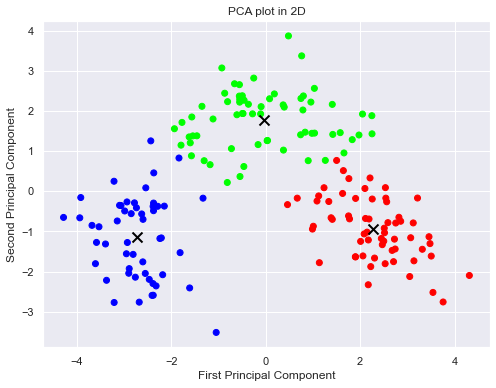

In [20]:
#PCA plot coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_sc, cmap="brg")
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=100, linewidths=2, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [21]:
#Trying a 3D scatterplot


# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels_sc, size=0.1*np.ones(len(scaled_data)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

# Agglomerative Heirarchial Clustering

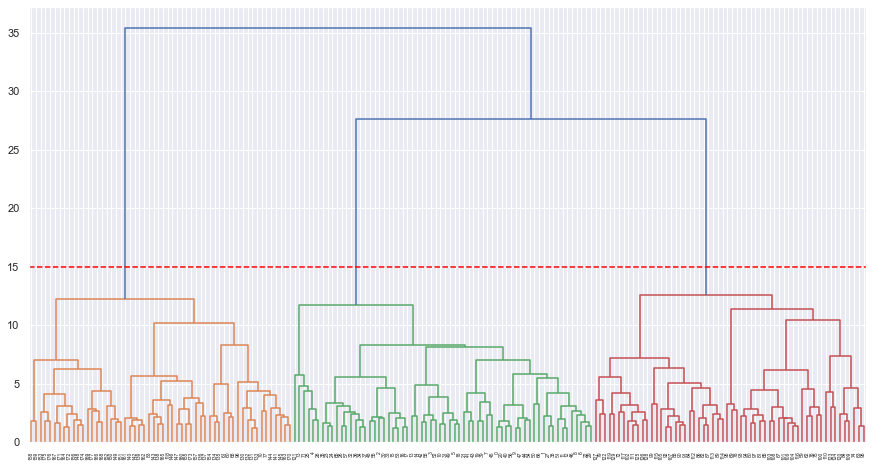

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

linked = linkage(scaled_data,method='ward')
plt.figure(figsize = (15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(15,0,5000,colors='red',linestyles='dashed')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage = 'ward')
labels = cluster.fit_predict(scaled_data)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
#Clusters
n_clusters = cluster.n_clusters_
print(n_clusters)

3


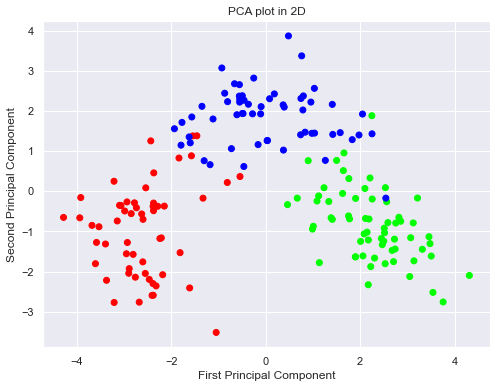

In [25]:
#PCA plot coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap="brg")
#plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=100, linewidths=2, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

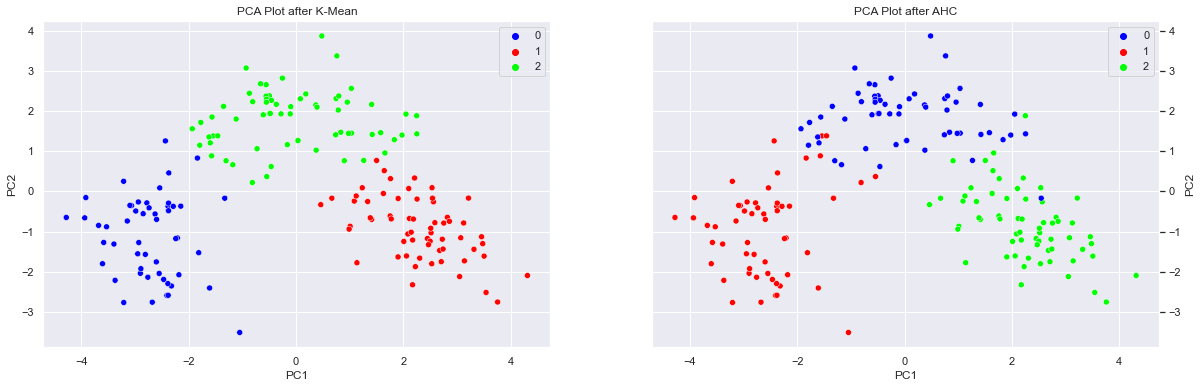

In [26]:
#Comparing plots by K-means vs Agglomerate clustering 
fig,axes = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =labels_sc,palette='brg', ax=axes[0])
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =labels,palette='brg', ax=axes[1])

axes[0].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after K-Mean')
axes[1].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after AHC')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

Conclusion:

1. Both the clustering method has given the optimum cluster value as 3.
2. But herirachial method has some datapoints which are merged. 
3. Therefore K-means clustering is better for this dataset. 


In [27]:
#adding produced labels to  dataframe
wine_df['KMean_ClusterID']= pd.Series(labels_sc)
wine_df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  KMean_ClusterID  
0   3.92     1065                1  
1   3.40     1050                1  
2   3.17     1185                1  
3   3.45     1480                1  
4   2.93      735                1